## 10.2 Exercise: Recommender System
## 
## Daniel Angel
## Bellevue University
## DSC 630 - Predictive Analytics
## Professor Andrew Hua
## February 18, 2024




Using the small MovieLens data set, create a recommender system that allows users to input a movie they like (in the data set) and recommends ten other movies for them to watch. In your write-up, clearly explain the recommender system process and all steps performed. If you are using a method found online, be sure to reference the source.
You can use R or Python to complete this assignment. Submit your code and output to the submission link. Make sure to add comments to all of your code and to document your steps, process, and analysis.

https://analyticsindiamag.com/how-to-build-your-first-recommender-system-using-python-movielens-dataset/
Last updated October 10, 2020
In AI Mysteries
How To Build Your First Recommender System Using Python & MovieLens Dataset
by Amal Nair

Special thanks to author Amal Nair for their tutorial which I followed closely and without who's guidance I could not have made my first recommender.

https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

Also, special acknowledgements to author Usman Malik who's tutorial I also loosely followed in creating this recommender.

https://stackoverflow.com/questions/54961616/how-to-solve-c-covx-y-rowvar-runtimewarning-degrees-of-freedom-0-for-s

Also, special thanks to user Heikki Särkkä who posted a fix to a divide by zero warning I was getting with my correlations.

### Load necessary libraries. Read in small MovieLens datatset ratings.csv. Drop 'timestamp' column. Show first few rows.

In [1]:
import numpy as np
import pandas as pd

ratings_df = pd.read_csv('ratings.csv')
ratings_df.drop(columns = ['timestamp'], inplace=True)
ratings_df.head(3)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0


### Read in small MovieLens datatset movies.csv. Show first few rows.

In [2]:
movie_df = pd.read_csv("movies.csv")
movie_df.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


### Create a merged dataframe

In [3]:
df = ratings_df.merge(movie_df,on='movieId', how='left')
df.head(3)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller


### Create a new dataframe with each movie's average rating

In [4]:
rating_avgs = pd.DataFrame(df.groupby('title')['rating'].mean().round(2))
rating_avgs.head(3)

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5


### Add a column containing counts of ratings to our average rating dataframe

In [5]:
ratings_info=rating_avgs.copy()
ratings_info['Total Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings_info = ratings_info.iloc[:, [1, 0]]
ratings_info.rename(columns={'rating': 'Average Rating'}, inplace=True)
ratings_info.head(3)

,Total Ratings,Average Rating
title,,
'71 (2014),1,4.0
'Hellboy': The Seeds of Creation (2004),1,4.0
'Round Midnight (1986),2,3.5


### Visualize distribution of Ratings Counts

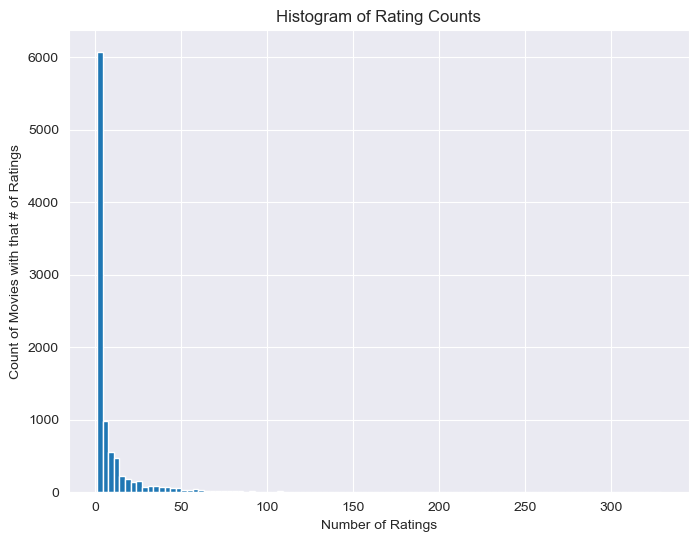

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
plt.title('Histogram of Rating Counts')
plt.ylabel('Count of Movies with that # of Ratings')
plt.xlabel('Number of Ratings')
plot = ratings_info['Total Ratings'].hist(bins=100)

### Visualize distribution of Average Ratings Counts

<AxesSubplot:title={'center':'Histogram of Average Ratings'}, xlabel='Average Rating', ylabel='Counts'>

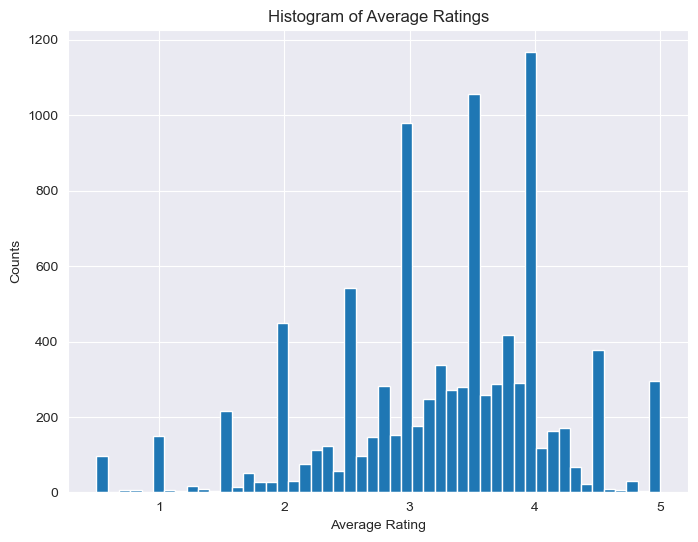

In [10]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
plt.title('Histogram of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Counts')
ratings_info['Average Rating'].hist(bins=50)

### Create a dataframe with Movie Titles as the columns, Users as the rows, and Ratings as the values

In [11]:
user_movie_matrix = df.pivot_table(index='userId',columns='title',values='rating')
user_movie_matrix.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Define a function which produces a correlation matrix based on a movie title

In [12]:
def corr_matrix(movie_title):
    user_movie_rating = user_movie_matrix[user_movie_matrix.get(movie_title).notnull()]
    # The above line removes all users who have not rated 'movie_title'
    user_movie_rating = user_movie_rating.dropna(axis='columns', thresh=2)
    # The above line removes movies with less than 2 ratings from people
    # who also rated 'movie_title'
    corr_matrix = user_movie_rating.corrwith(user_movie_rating[movie_title])
    return corr_matrix

### Define a function which produces a data frame containing correlation scores and ratings information when given the title of a movie

In [13]:
def suggested_scores(movie_title):
    cor1 = corr_matrix(movie_title)
    suggested_scores = pd.DataFrame(cor1,columns=['Correlation'])
    suggested_scores.dropna(inplace=True)
    suggested_scores = suggested_scores.join(ratings_info)
    return suggested_scores

### Define a function which when given a movie title produces a subset of the above dataframe containing only movies with at least 75 ratings and sorted by correlation score

In [14]:
"""The choice to eliminate movies with less than 75 ratings is a rather arbitrary one.
   It was halfway between 50 and 100 which were other possibilities. If a data set
   containing more or less ratings was used this number could be raised or lowered
   accordingly."""
def select_picks_pool(movie_title):
    sug1 = suggested_scores(movie_title)
    picks_pool = sug1[sug1['Total Ratings']>74
                     ].sort_values('Correlation',ascending=False).reset_index()
    picks_pool = picks_pool.merge(movie_df,on='title', how='left')
    return picks_pool

### Define a function which gives the top 10 picks when provided a movie title. It removes the movie from its own list in the case that it is the top pick.

In [15]:
def pick_top_10(movie_title):
    picks1 = select_picks_pool(movie_title)
    top_10 = picks1.head(11)
    if top_10['title'][0] == movie_title:
        top_10 = top_10.iloc[1:12]
    else:
        top_10 = top_10.iloc[0:11]
    return top_10

### Define a function that outputs various recommended movies based on different criteria from within the top 10 picks. These are highest rated ( highest Average Rating score), best matched( highest correlation score ), and most watched (has the highest count of rating)

In [16]:
def give_suggestions_based_on(movie_title):
    tops1 = pick_top_10(movie_title)
    highest_rated = tops1.sort_values('Average Rating', ascending=False).iloc[0]
    best_matched = tops1.sort_values('Correlation', ascending=False).iloc[0]
    most_watched = tops1.sort_values('Total Ratings', ascending=False).iloc[0]
    return highest_rated, best_matched, most_watched

### Define a function which displays the recommended movies' results in a readable text format.

In [17]:
def display_recc_results(movie_title):
    if movie_title not in movie_df.title.to_list():
        print('Movie is not currently in our recommender system or the title'
               " is not formatted correctly.")
        print()
        print("Proper format is: 'Movie Title (Year)' ")
    else:
        highest_rated, best_matched, most_watched = give_suggestions_based_on(movie_title)
        print(f'Based on your preference of the movie {movie_title} '
          'we have come up with 10 recommendations.')
        print()
        print(f'The highest rated of these recommendations is the film {highest_rated.title}'
             f' which has a rating of {highest_rated[3]} among '
             f'{highest_rated[2]} total ratings.')
        print()
        print(f'Out of our recommendations the movie which has been rated the most '
              f'amount of times is {most_watched.title} which has been rated at least '
              f'{most_watched[2]} times.')
        print()
        print(f'Our best guess for a movie which you would like is {best_matched.title}'
             f'. This is based on the ratings of other users who also rated {movie_title}.')
        print()
        print('The full list of our top 10 recommendations is (rated in order of likelihood): ')
        print()
        for x in pick_top_10(movie_title).title:
            print(f'{x} ,  ')
    

## Test out the recommender on a few different movies within the data set

In [18]:
display_recc_results('Shawshank Redemption, The (1994)')

Based on your preference of the movie Shawshank Redemption, The (1994) we have come up with 10 recommendations.

The highest rated of these recommendations is the film Rear Window (1954) which has a rating of 4.26 among 84 total ratings.

Out of our recommendations the movie which has been rated the most amount of times is Schindler's List (1993) which has been rated at least 220 times.

Our best guess for a movie which you would like is Rear Window (1954). This is based on the ratings of other users who also rated Shawshank Redemption, The (1994).

The full list of our top 10 recommendations is (rated in order of likelihood): 

Rear Window (1954) ,  
City of God (Cidade de Deus) (2002) ,  
Leaving Las Vegas (1995) ,  
Four Weddings and a Funeral (1994) ,  
Shakespeare in Love (1998) ,  
Big (1988) ,  
Schindler's List (1993) ,  
Back to the Future Part II (1989) ,  
Bourne Ultimatum, The (2007) ,  
Usual Suspects, The (1995) ,  


In [19]:
display_recc_results('Fight Club (1999)')

Based on your preference of the movie Fight Club (1999) we have come up with 10 recommendations.

The highest rated of these recommendations is the film Pulp Fiction (1994) which has a rating of 4.2 among 307 total ratings.

Out of our recommendations the movie which has been rated the most amount of times is Pulp Fiction (1994) which has been rated at least 307 times.

Our best guess for a movie which you would like is Life Is Beautiful (La Vita è bella) (1997). This is based on the ratings of other users who also rated Fight Club (1999).

The full list of our top 10 recommendations is (rated in order of likelihood): 

Life Is Beautiful (La Vita è bella) (1997) ,  
Outbreak (1995) ,  
Pulp Fiction (1994) ,  
Heat (1995) ,  
Four Weddings and a Funeral (1994) ,  
Firm, The (1993) ,  
Seven (a.k.a. Se7en) (1995) ,  
Léon: The Professional (a.k.a. The Professional) (Léon) (1994) ,  
Memento (2000) ,  
Interview with the Vampire: The Vampire Chronicles (1994) ,  


In [20]:
display_recc_results('Spaceballs (1987)')

Based on your preference of the movie Spaceballs (1987) we have come up with 10 recommendations.

The highest rated of these recommendations is the film Dark Knight, The (2008) which has a rating of 4.24 among 149 total ratings.

Out of our recommendations the movie which has been rated the most amount of times is Aladdin (1992) which has been rated at least 183 times.

Our best guess for a movie which you would like is Ace Ventura: When Nature Calls (1995). This is based on the ratings of other users who also rated Spaceballs (1987).

The full list of our top 10 recommendations is (rated in order of likelihood): 

Ace Ventura: When Nature Calls (1995) ,  
Heat (1995) ,  
Monsters, Inc. (2001) ,  
Santa Clause, The (1994) ,  
Aladdin (1992) ,  
Dark Knight, The (2008) ,  
Die Hard: With a Vengeance (1995) ,  
Blues Brothers, The (1980) ,  
Star Trek: First Contact (1996) ,  
Dogma (1999) ,  
Snatch (2000) ,  


In [21]:
display_recc_results('Harold and Maude (1971)')

Based on your preference of the movie Harold and Maude (1971) we have come up with 10 recommendations.

The highest rated of these recommendations is the film Star Wars: Episode V - The Empire Strikes Back (1980) which has a rating of 4.22 among 211 total ratings.

Out of our recommendations the movie which has been rated the most amount of times is Star Wars: Episode V - The Empire Strikes Back (1980) which has been rated at least 211 times.

Our best guess for a movie which you would like is Inglourious Basterds (2009). This is based on the ratings of other users who also rated Harold and Maude (1971).

The full list of our top 10 recommendations is (rated in order of likelihood): 

Inglourious Basterds (2009) ,  
Dark Knight Rises, The (2012) ,  
Game, The (1997) ,  
Full Metal Jacket (1987) ,  
What's Eating Gilbert Grape (1993) ,  
Amadeus (1984) ,  
Kill Bill: Vol. 1 (2003) ,  
Office Space (1999) ,  
Jumanji (1995) ,  
Ace Ventura: When Nature Calls (1995) ,  
Star Wars: Episode

### Test out the recommender on movies which are not in the data set

In [22]:
display_recc_results('Gone With the Wind (1940)')

Movie is not currently in our recommender system or the title is not formatted correctly.

Proper format is: 'Movie Title (Year)' 


In [23]:
display_recc_results('Casablanca (1943)')

Movie is not currently in our recommender system or the title is not formatted correctly.

Proper format is: 'Movie Title (Year)' 


#### The recommender relies on correlation coefficients of ratings. By looking at other ratings by people who rated the movie we are interested in and the correlations we can predict other movies that you are likely to rate similarly. Those movies with ratings having the highest correlation coefficient scores are those that we are recommending.